In [1]:
import os
import numpy as np
from tqdm import tqdm
import SimpleITK as sitk
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.transform import resize


In [2]:
def resize_image(original_array, target_shape=512):
    height, width = original_array.shape

    if height > width:
        padding = (height - width) // 2
        padded_image = np.pad(original_array, ((0, 0), (padding, height - width - padding)), 'constant')
    elif width > height:
        padding = (width - height) // 2
        padded_image = np.pad(original_array, ((padding, width - height - padding), (0, 0)), 'constant')
    else:
        padded_image = original_array.copy()  # 이미 가로와 세로 길이가 같은 경우

    return resize(padded_image, (target_shape, target_shape), anti_aliasing=True)

In [3]:
root = '/inye/dataset'
original_dir = os.path.join(root, 'T1_2D_slice')
result_dir = os.path.join(root, 'T1_2D_slice_512')


In [4]:
imgs = os.listdir(original_dir)
for img in tqdm(imgs):
    img_path = os.path.join(original_dir, img)
    img_arr = sitk.GetArrayFromImage(sitk.ReadImage(img_path))
    resized_img_arr = resize_image(img_arr)
    if resized_img_arr.min() == resized_img_arr.max():
        print(img)
        continue
    resized_img_arr = (resized_img_arr - resized_img_arr.min()) / (resized_img_arr.max() - resized_img_arr.min())
    resized_img = sitk.GetImageFromArray(resized_img_arr)
    save_path = os.path.join(result_dir, img+".nii.gz")
    sitk.WriteImage(resized_img, save_path)
    # break

  0%|          | 0/7200 [00:00<?, ?it/s]

 64%|██████▍   | 4591/7200 [05:30<02:47, 15.55it/s]

ADNI070S4692_M03.nii.gz


100%|██████████| 7200/7200 [08:37<00:00, 13.91it/s]


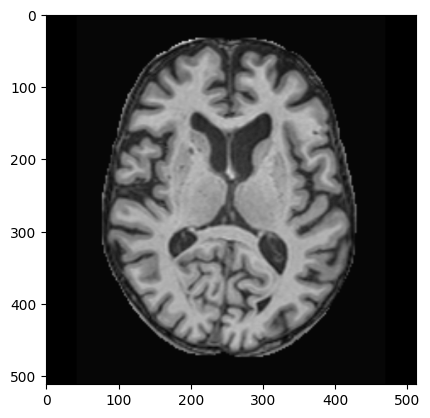

In [17]:
plt.imshow(resized_img_arr, cmap='gray')

In [21]:
print(resized_img_arr.min(), resized_img_arr.max())

0.0 1.0
